<a href="https://colab.research.google.com/github/Samplergithub769/Stock-Predictions-Model/blob/main/Stock_Trend_Prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2012-01-05,16.354963,16.478058,16.285971,16.432394,131808205
2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...
2022-12-14,94.968758,96.871923,93.603668,95.197938,26452900
2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354963,16.478058,16.285971,16.432394,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.968758,96.871923,93.603668,95.197938,26452900
2757,2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800
2758,2022-12-16,90.534698,91.421511,89.687743,90.873478,48485500


In [6]:
ma_100_days=data.Close.rolling(100).mean()


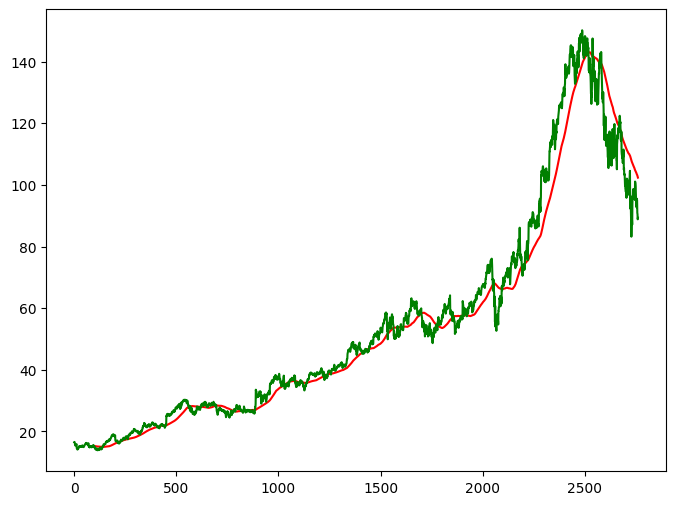

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

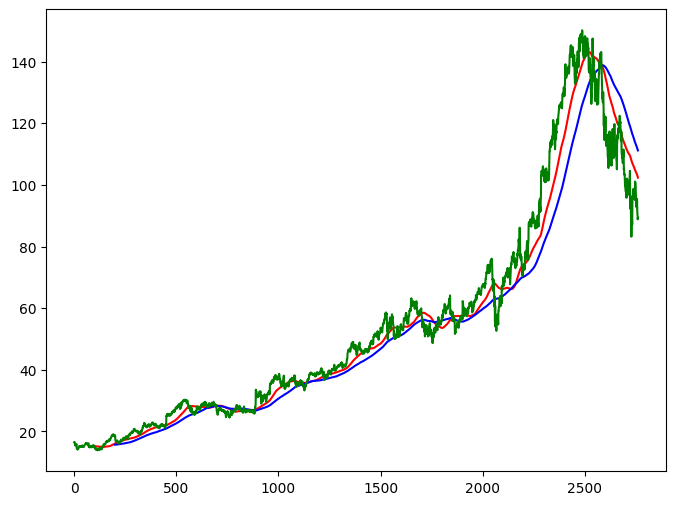

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show

In [10]:
data.dropna(inplace=True)

In [11]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [12]:
data_train.shape[0],data_test.shape[0]

(2208, 553)

In [13]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale=scaler.fit_transform(data_train)

In [15]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])


In [16]:
x,y=np.array(x),np.array(y)

In [17]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [18]:
model=Sequential()
model.add(LSTM(units=50,activation='relu', return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))







/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 189ms/step - accuracy: 5.1251e-04 - loss: 4.4556e-08
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 4.0227e-04 - loss: 4.5486e-08
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 5.1251e-04 - loss: 4.4527e-08
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 5.8970e-05 - loss: 4.4757e-08
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 4.7280e-04 - loss: 4.4539e-08
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 1.9445e-04 - loss: 4.4221e-08
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 2.9984e-04 - loss: 4.3390e-08
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 3.7064e-04 - loss: 4.4020e-08
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 2.3838e-04 - loss: 4.3878e-08
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 4.7280e-04 - loss: 4.4085e-08
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 2.0505e-04 - l

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days=data_train.tail(100)

In [23]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [24]:
data_test

Ticker,GOOG
0,70.084183
1,69.888878
2,70.268517
3,70.597328
4,70.638184
...,...
648,94.968758
649,90.873482
650,90.534698
651,88.830818


In [25]:
data_test_scale=scaler.fit_transform(data_test)

In [26]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [27]:
x.shape,y.shape

((553, 100, 1), (553,))

In [28]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step


In [29]:
y_predict.shape

(553, 1)

In [30]:
y_predict

array([[ 8.12136568e-06],
       [ 2.77817890e-07],
       [-9.89831460e-06],
       [-2.16156477e-05],
       [-3.41568593e-05],
       [-4.69069346e-05],
       [-5.86781389e-05],
       [-6.87105057e-05],
       [-7.71827035e-05],
       [-8.47129777e-05],
       [-9.20689781e-05],
       [-9.88631655e-05],
       [-1.04667939e-04],
       [-1.08042885e-04],
       [-1.08694920e-04],
       [-1.07602347e-04],
       [-1.05873150e-04],
       [-1.04581108e-04],
       [-1.05718333e-04],
       [-1.10566798e-04],
       [-1.19145450e-04],
       [-1.30516171e-04],
       [-1.42987556e-04],
       [-1.55169691e-04],
       [-1.65946010e-04],
       [-1.74899818e-04],
       [-1.81937576e-04],
       [-1.86954174e-04],
       [-1.89638085e-04],
       [-1.89990387e-04],
       [-1.87967031e-04],
       [-1.83606549e-04],
       [-1.77600945e-04],
       [-1.70752784e-04],
       [-1.63964665e-04],
       [-1.57455710e-04],
       [-1.51731248e-04],
       [-1.47428873e-04],
       [-1.4

In [31]:
scale=1/scaler.scale_

In [32]:
y_predict = y_predict*scale

In [33]:
y = y*scale

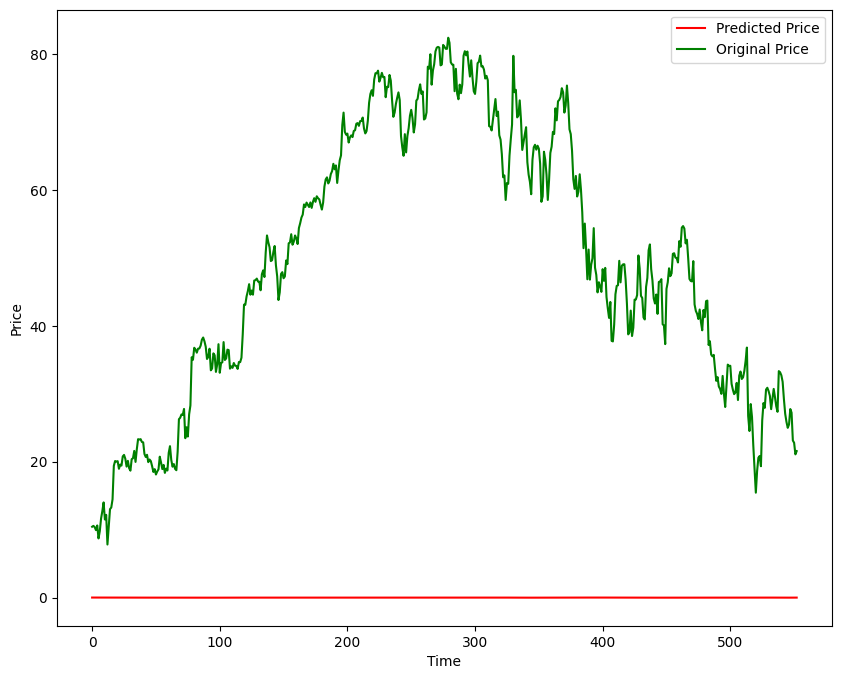

In [34]:


plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
model.save('Stock Predictor Model.h5')